In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
#Fetching dataset from kaggle
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:57<00:00, 18.1MB/s]
100% 1.06G/1.06G [00:57<00:00, 19.7MB/s]


In [6]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [8]:
#generators - divide datas into batches
#to work with large amount of data
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
#Normalize the data
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)  

In [10]:
#Building the CNN model
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))





In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])


In [17]:
history = model.fit_generator(train_ds,epochs=10,validation_data=validation_ds)



Epoch 1/10


<ipython-input-17-abaf6a09d97d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_ds,epochs=10,validation_data=validation_ds)


625/625 [==============================] - 74s 117ms/step - loss: 0.0488 - acc: 0.9840 - val_loss: 0.8051 - val_acc: 0.8248
Epoch 2/10
625/625 [==============================] - 74s 119ms/step - loss: 0.0461 - acc: 0.9848 - val_loss: 0.8351 - val_acc: 0.8132
Epoch 3/10
625/625 [==============================] - 73s 116ms/step - loss: 0.0410 - acc: 0.9877 - val_loss: 0.9981 - val_acc: 0.8312
Epoch 4/10
625/625 [==============================] - 73s 116ms/step - loss: 0.0460 - acc: 0.9872 - val_loss: 1.0535 - val_acc: 0.8242
Epoch 5/10
625/625 [==============================] - 73s 117ms/step - loss: 0.0402 - acc: 0.9874 - val_loss: 0.8619 - val_acc: 0.8254
Epoch 6/10
625/625 [==============================] - 73s 117ms/step - loss: 0.0308 - acc: 0.9901 - val_loss: 1.1238 - val_acc: 0.7672
Epoch 7/10
625/625 [==============================] - 73s 117ms/step - loss: 0.0280 - acc: 0.9911 - val_loss: 1.5151 - val_acc: 0.8194
Epoch 8/10
625/625 [==============================] - 73s 116ms/st

In [18]:
model.save('/content/mymodel.h5',history)

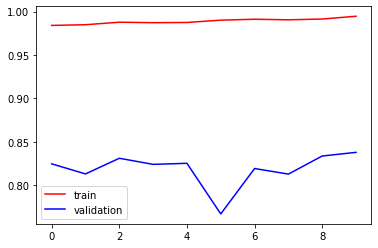

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'],color='red',label='train')
plt.plot(history.history['val_acc'],color='blue',label='validation')
plt.legend()
plt.show()

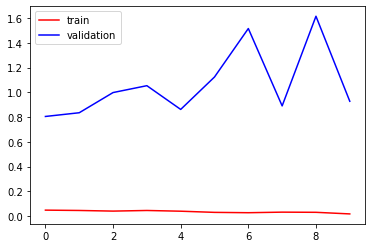

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#ways to reduce overfitting

#Add more data
#Data Augmentation
#L1/L2 regularization
#Batch Norm
#Dropouts
#Reducs complexity

Testing the model

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread("/content/dog.4006.jpg")

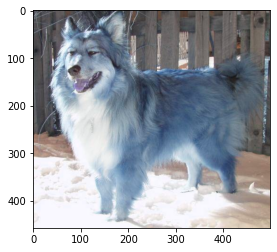

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(458, 499, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape((1,256,256,3))

In [ ]:
result = model.predict(test_input)

1/1 [==============================] - 0s 250ms/step


In [ ]:
if result[0][0]==1:
  prediction="Dog"
else:
  prediction='cat'  

In [ ]:
print("Uploaded image is of",prediction)

Uploaded image is of Dog


In [ ]:
result


array([[1.]], dtype=float32)